In [4]:
#Observation
#1) Capomulin treatment had almost 20 percent reduction in tumor growth.
#2) Metastaic spread during tratment was most pronounced with Racebo treatment.
#3) Chances of a survival was maximum for Capomulin treatment.


# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axis as ax
import pandas as pd
import numpy as np
from pandas import DataFrame

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "/Users/anirbanmukherjee/Documents/UNC Homeworks/HW_10192019/mouse_drug_data.csv"
clinical_trial_data_to_load = "/Users/anirbanmukherjee/Documents/UNC Homeworks/HW_10192019/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
alldata = pd.merge(mouse_data, clinical_trial_data, on="Mouse ID")

# Display the data table for preview
alldata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = alldata.groupby(['Drug', 'Timepoint'])
mtv = mean_tumor_volume[[ "Tumor Volume (mm3)"]].mean()

# Convert to DataFrame
mtv = pd.DataFrame(mtv)
mtv2 = mtv.reset_index()
# Preview DataFrame
mtv2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_of_tumor_volume = alldata.groupby(['Drug', 'Timepoint'])
seotv = standard_error_of_tumor_volume[[ "Tumor Volume (mm3)"]].sem()

# Convert to DataFrame
seotv = pd.DataFrame(seotv)
seotv2 = seotv.reset_index()

# Preview DataFrame
seotv2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_data_table = mtv2.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
se_data_table = seotv2.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Dropping columns
mean_data_table_2 = mean_data_table.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
se_data_table_2 = se_data_table.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)

# Preview that Reformatting worked
mean_data_table_3 = mean_data_table_2.reset_index()
se_data_table_3 = se_data_table_2.reset_index()
mean_data_table_3.head()
#se_data_table_3

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


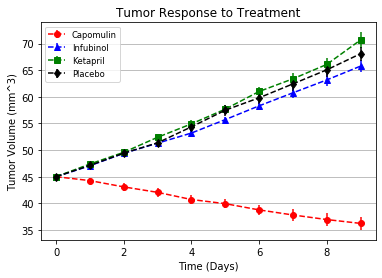

In [41]:
# Generate the Plot (with Error Bars)
#mean_plot = mean_data_table_3.plot(kind="line", x="Timepoint", y="Ketapril")
fig, mean_plot = plt.subplots()
#plt.errorbar(x=mean_data_table_3['Timepoint'],y=mean_data_table_3['Ketapril'], yerr=1, linestyle="--",fmt='o')
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
mean_plot.errorbar(mean_data_table_3.index, mean_data_table_3["Capomulin"], 
                   se_data_table_3["Capomulin"], fmt = "o", color="r", linestyle="--", label="Capomulin")
mean_plot.errorbar(mean_data_table_3.index, mean_data_table_3["Infubinol"], 
                   se_data_table_3["Infubinol"], fmt = "^", color="b", linestyle="--", label="Infubinol")
mean_plot.errorbar(mean_data_table_3.index, mean_data_table_3["Ketapril"], 
                   se_data_table_3["Ketapril"], fmt = "s", color="g", linestyle="--", label="Ketapril")
mean_plot.errorbar(mean_data_table_3.index, mean_data_table_3["Placebo"], 
                   se_data_table_3["Placebo"], fmt = "d", color="k", linestyle="--", label="Placebo")

mean_plot.set_xlabel("Time (Days)")
mean_plot.set_ylabel("Tumor Volume (mm^3)")
plt.title('Tumor Response to Treatment')
plt.grid(b=True, which='major', axis='y')
plt.legend(loc="best", fontsize="small",fancybox=True)
# Save the Figure
#plt.figure(figsize=10, 7)
plt.savefig("TumorResponseToTreatment.png")
plt.show()

## Metastatic Response to Treatment

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_site = alldata.groupby(['Drug', 'Timepoint'])
mms = mean_metastatic_site[[ "Metastatic Sites"]].mean()

# Convert to DataFrame
mms_df = pd.DataFrame(mms)
mms2 = mms_df.reset_index()
# Preview DataFrame
mms2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_of_metastatic_sites = alldata.groupby(['Drug', 'Timepoint'])
seoms = standard_error_of_metastatic_sites[[ "Metastatic Sites"]].sem()

# Convert to DataFrame
seoms_df = pd.DataFrame(seoms)
seoms2 = seoms_df.reset_index()

# Preview DataFrame
seoms2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [25]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_site_data_table = mms2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
se_metastatic_site_data_table = seoms2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Dropping columns
mean_metastatic_site_data_table_2 = mean_metastatic_site_data_table.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
se_metastatic_site_data_table_2 = se_metastatic_site_data_table.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)

# Preview that Reformatting worked
mean_metastatic_site_data_table_3 = mean_metastatic_site_data_table_2.reset_index()
se_metastatic_site_data_table_3 = se_metastatic_site_data_table_2.reset_index()

mean_metastatic_site_data_table_3
#se_metastatic_site_data_table_3

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


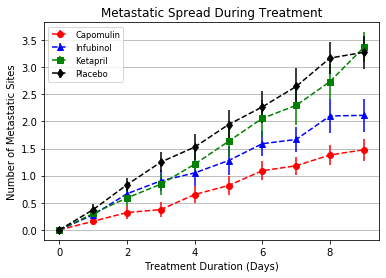

In [42]:
# Generate the Plot (with Error Bars)
fig, metastatic_plot = plt.subplots()

#drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
metastatic_plot.errorbar(mean_metastatic_site_data_table_3.index, mean_metastatic_site_data_table_3["Capomulin"], 
                   se_metastatic_site_data_table_3["Capomulin"], fmt = "o", color="r", linestyle="--", label="Capomulin")
metastatic_plot.errorbar(mean_metastatic_site_data_table_3.index, mean_metastatic_site_data_table_3["Infubinol"], 
                   se_metastatic_site_data_table_3["Infubinol"], fmt = "^", color="b", linestyle="--", label="Infubinol")
metastatic_plot.errorbar(mean_metastatic_site_data_table_3.index, mean_metastatic_site_data_table_3["Ketapril"], 
                   se_metastatic_site_data_table_3["Ketapril"], fmt = "s", color="g", linestyle="--", label="Ketapril")
metastatic_plot.errorbar(mean_metastatic_site_data_table_3.index, mean_metastatic_site_data_table_3["Placebo"], 
                   se_metastatic_site_data_table_3["Placebo"], fmt = "d", color="k", linestyle="--", label="Placebo")

metastatic_plot.set_xlabel("Treatment Duration (Days)")
metastatic_plot.set_ylabel("Number of Metastatic Sites")
plt.title('Metastatic Spread During Treatment')
plt.grid(b=True, which='major', axis='y')
plt.legend(loc="best", fontsize="small",fancybox=True)

#plt.figure(figsize=10, 7)


# Save the Figure
plt.savefig("MetastaticSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = alldata.groupby(['Drug', 'Timepoint'])
mc = mouse_count[[ "Mouse ID"]].count()
# Convert to DataFrame
mc = pd.DataFrame(mc)
mc2 = mc.reset_index()
mc2 = mc2.rename(columns = {"Mouse ID":"Mouse Count"})
# Preview DataFrame
mc2.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
mouse_survival = mc2.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Dropping columns
mouse_survival_2 = mouse_survival.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)

# Preview the Data Frame
mouse_survival_3 = mouse_survival_2.reset_index()
mouse_survival_3

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


In [29]:
mouse_survival_3["Capomulin"].max()

25

In [30]:
mouse_survival_4 = mouse_survival_3
mouse_survival_4["Capomulin_pct"]=mouse_survival_3["Capomulin"]/mouse_survival_3["Capomulin"].max() * 100
mouse_survival_4["Infubinol_pct"]=mouse_survival_3["Infubinol"]/mouse_survival_3["Infubinol"].max() * 100
mouse_survival_4["Ketapril_pct"]=mouse_survival_3["Ketapril"]/mouse_survival_3["Ketapril"].max() * 100
mouse_survival_4["Placebo_pct"]=mouse_survival_3["Placebo"]/mouse_survival_3["Placebo"].max() * 100
mouse_survival_4

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_pct,Infubinol_pct,Ketapril_pct,Placebo_pct
0,0,25,25,25,25,100.0,100.0,100.0,100.0
1,5,25,25,23,24,100.0,100.0,92.0,96.0
2,10,25,21,22,24,100.0,84.0,88.0,96.0
3,15,24,21,19,20,96.0,84.0,76.0,80.0
4,20,23,20,19,19,92.0,80.0,76.0,76.0
5,25,22,18,19,17,88.0,72.0,76.0,68.0
6,30,22,17,18,15,88.0,68.0,72.0,60.0
7,35,22,12,17,14,88.0,48.0,68.0,56.0
8,40,21,10,15,12,84.0,40.0,60.0,48.0
9,45,21,9,11,11,84.0,36.0,44.0,44.0


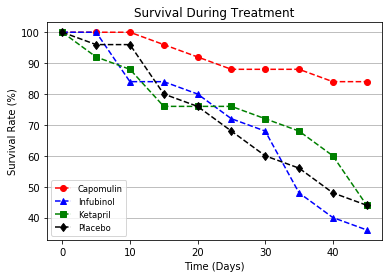

In [44]:
# Generate the Plot (Accounting for percentages)
fig, survival_plot = plt.subplots()
survival_plot.plot(mouse_survival_4['Timepoint'], mouse_survival_4['Capomulin_pct'], marker="o", color="r", linestyle="--", label="Capomulin")
survival_plot.plot(mouse_survival_4['Timepoint'], mouse_survival_4['Infubinol_pct'], marker="^", color="b", linestyle="--", label="Infubinol")
survival_plot.plot(mouse_survival_4['Timepoint'], mouse_survival_4['Ketapril_pct'], marker="s", color="g", linestyle="--", label="Ketapril")
survival_plot.plot(mouse_survival_4['Timepoint'], mouse_survival_4['Placebo_pct'], marker="d", color="k", linestyle="--", label="Placebo")

survival_plot.set_xlabel("Time (Days)")
survival_plot.set_ylabel("Survival Rate (%)")
plt.title('Survival During Treatment')
plt.grid(b=True, which='major', axis='y')
plt.legend(loc="best", fontsize="small",fancybox=True)

# Save the Figure
plt.savefig("SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug
tumor_vol_change = (mean_data_table_3.iloc[-1] - mean_data_table_3.iloc[0]) / mean_data_table_3.iloc[0] * 100
tvc = pd.DataFrame(tumor_vol_change).reset_index()
tvc.drop([0], inplace=True)
tvc = tvc.rename(columns = {0: "% Change"})
# Display the data to confirm
tvc

,Drug,% Change
1,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Placebo,51.297960


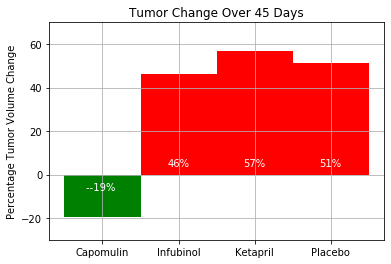

In [45]:
tumor_change = []
tumor_change = (tumor_vol_change["Capomulin"],tumor_vol_change["Infubinol"], tumor_vol_change["Ketapril"], tumor_vol_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
indices = np.arange(len(tumor_change))  
width = 1
rectsPass = ax.bar(indices[0], tumor_change[0], width, color='green')
rectsFail = ax.bar(indices[1:], tumor_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Percentage Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Days')
ax.set_xticks(indices)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("change.png")

# Show the Figure
fig.show()